# 데이터 로딩

In [1]:
json_url = "https://raw.githubusercontent.com/pyhub-kr/dump-data/refs/heads/main/melon/melon-20251027.json"

In [2]:
import requests  # pip install requests 명령으로 설치

In [3]:
res = requests.get(json_url)
song_list = res.json()

## #1. 좋아요 수 top5 노래 출력

1. 좋아요 수 필드에 대한 내림차순 정렬
2. 처음 5개 노래만 슬라이싱

In [4]:
# sorted : 인자로 전달받은 리스트를 특정 필드값을 기준으로 정렬한 새로운 리스트를 반환
#  - reverse : 내림차순 여부 (디폴트: False)
#  - key : 새로운 정렬 기준값을 만들어주는 함수

def 좋아요수_추출(song):
    return song["좋아요"]

좋아요_top5_song_list = sorted(song_list, reverse=True, key=좋아요수_추출)[0:5]
len(좋아요_top5_song_list)

5

In [5]:
for song in 좋아요_top5_song_list:
    # 출력되는 문자열 포맷팅 지정이 번거롭고, 코드 가독성이 좋지 않아요.
    # print(song["순위"], song["곡명"], song["artist_name"], song["좋아요"])
    # 두번째가 더 번거로운데요???
    # print("{순위} {곡명} {artist_name} {좋아요}".format(
    #     순위=song["순위"],
    #     곡명=song["곡명"],
    #     artist_name=song["artist_name"],
    #     좋아요=song["좋아요"],
    # ))
    # 함수 인자 전달 시에 dict 타입 값 앞에 ** 를 붙여서
    # dict 값의 모든 key/value 를 인자로 전달 => unpack
    print("{순위} {곡명} {artist_name} {좋아요} - {발매일}".format(**song))

28 어떻게 이별까지 사랑하겠어, 널 사랑하는 거지 AKMU (악뮤) 488748 - 2019-09-25
43 주저하는 연인들을 위해 잔나비 449980 - 2019-03-13
46 모든 날, 모든 순간 (Every day, Every Moment) 폴킴 438249 - 2018-03-20
42 예뻤어 DAY6 (데이식스) 376274 - 2017-02-06
40 한 페이지가 될 수 있게 DAY6 (데이식스) 361645 - 2019-07-15


In [6]:
# pandas 는 쉬었다가, 3시부터 이어서 하겠습니다.

## pandas로 해봅시다.

In [7]:
import pandas as pd

In [8]:
song_df = pd.DataFrame(song_list).set_index("곡일련번호")
print(song_df.shape)
song_df.head()

(100, 11)


,순위,album_uid,album_name,곡명,artist_uid,artist_name,커버이미지_주소,가사,장르,발매일,좋아요
곡일련번호,,,,,,,,,,,
600243411,1,12149391,Blue Valentine,Blue Valentine,3070786,NMIXX,https://cdnimg.melon.co.kr/cm2/album/images/12...,You’ll always be my blue valentine\nYou’ll alw...,[댄스],2025-10-13,57463
39166708,2,11859863,KPop Demon Hunters (Soundtrack from the Netfli...,Golden,4348386,HUNTR/X,https://cdnimg.melon.co.kr/cm2/album/images/11...,"I was a ghost, I was alone, hah\n어두워진, hah, 앞길...",[애니메이션/웹툰],2025-06-20,181360
600299706,3,12163032,타임캡슐,타임캡슐,236815,다비치,https://cdnimg.melon.co.kr/cm2/album/images/12...,점점 지쳐만 가는 \n많이 무료한 날들 \n하루 끝의 나를 돌아보기도 싫어 \n나도...,[발라드],2025-10-16,15386
36397952,4,11183506,OO-LI,Drowning,2086047,WOODZ,https://cdnimg.melon.co.kr/cm2/album/images/11...,미치도록 사랑했던\n지겹도록 다투었던\n네가 먼저 떠나고\n여긴 온종일 비가 왔어\...,[록/메탈],2023-04-26,263974
600287375,5,12160000,Good Goodbye,Good Goodbye,756531,화사 (HWASA),https://cdnimg.melon.co.kr/cm2/album/images/12...,나를 그냥 짓밟고 가\n괜찮아 돌아보지 마\n내가 아파봤자 너만 하겠니\n이젠 너를...,[발라드],2025-10-15,16790


In [9]:
# 아래 출력에서 dtype이 object이면 안 되요. object=문자열
# 좋아요 컬럼은 숫자(int64, float64)여야, 숫자로서 대소비교가 가능해지는 거죠.
song_df["좋아요"]

곡일련번호
600243411     57463
39166708     181360
600299706     15386
36397952     263974
600287375     16790
              ...  
37138469     173330
38516958      66085
39765733      30162
39765726      30958
600280518     12703
Name: 좋아요, Length: 100, dtype: int64

In [10]:
# 좋아요 필드에 대해서 내림차순 정렬을 수행할 새로운 DataFrame 반환
좋아요_내림차순_df = song_df.sort_values("좋아요", ascending=False)

# 아래 방법으로 상위 5개 행을 슬라이싱
# 좋아요_내림차순_df.head()  # 1
# 좋아요_내림차순_df[:5]     # 2
좋아요_top5_df = 좋아요_내림차순_df.iloc[:5]  # 3
print(좋아요_top5_df.shape)

(5, 11)


In [11]:
for (index, row) in 좋아요_top5_df.iterrows():
    print(row["곡명"])  # row : Series 타입

어떻게 이별까지 사랑하겠어, 널 사랑하는 거지
주저하는 연인들을 위해
모든 날, 모든 순간 (Every day, Every Moment)
예뻤어
한 페이지가 될 수 있게


## #2. 아티스트 별 평균 좋아요 수 합산

In [16]:
좋아요_dict = {}

for song in song_list:
    가수명 = song["artist_name"]
    좋아요 = song["좋아요"]
    if 가수명 in 좋아요_dict:
        좋아요_dict[가수명] += 좋아요
    else:
        좋아요_dict[가수명] = 좋아요
    
좋아요_dict

{'NMIXX': 57463,
 'HUNTR/X': 231176,
 '다비치': 15386,
 'WOODZ': 263974,
 '화사 (HWASA)': 16790,
 'BLACKPINK': 84009,
 'KPop Demon Hunters Cast': 178123,
 '우디 (Woody)': 66709,
 '박다혜': 55971,
 'ALLDAY PROJECT': 171635,
 'BOYNEXTDOOR': 227055,
 'aespa': 444033,
 '조째즈': 97479,
 'IVE (아이브)': 455712,
 '이창섭': 162603,
 '먼데이 키즈': 28361,
 'Kenshi Yonezu': 66327,
 '10CM': 135291,
 '다영 (DAYOUNG)': 35596,
 '마크툽 (MAKTUB)': 79225,
 'G-DRAGON': 536820,
 '황가람': 154238,
 '이무진': 287766,
 '로제 (ROSÉ)': 348387,
 'AKMU (악뮤)': 488748,
 'DAY6 (데이식스)': 1172184,
 '로이킴': 84326,
 '이찬혁': 48146,
 '아이유': 341165,
 'LE SSERAFIM (르세라핌)': 58164,
 '제니 (JENNIE)': 99226,
 '임영웅': 722586,
 '이클립스 (ECLIPSE)': 189263,
 '오반(OVAN)': 72137,
 '잔나비': 449980,
 '너드커넥션 (Nerd Connection)': 161841,
 '폴킴': 438249,
 'DK(디셈버)': 12933,
 'Lady Gaga': 120989,
 '성시경': 312894,
 'Hearts2Hearts (하츠투하츠)': 55647,
 'TWS (투어스)': 179185,
 '아일릿(ILLIT)': 186452,
 '이예은': 34303,
 '멜로망스': 231241,
 '경서예지': 218679,
 '박재정': 190530,
 '순순희(지환)': 75395,
 '임재현': 106082

In [25]:
song_df.groupby("artist_name")["좋아요"].agg(["count", "sum", "mean"]).sort_values("count", ascending=False)

,count,sum,mean
artist_name,,,
임영웅,11,722586,65689.636364
DAY6 (데이식스),5,1172184,234436.800000
aespa,4,444033,111008.250000
IVE (아이브),4,455712,113928.000000
아이유,3,341165,113721.666667
이무진,3,287766,95922.000000
BOYNEXTDOOR,3,227055,75685.000000
G-DRAGON,3,536820,178940.000000
QWER,3,294176,98058.666667


# 장르별 좋아요 top 5 출력

In [41]:
장르별_dict = {}

for song in song_list:
    for genre in song["장르"]:
        if genre not in 장르별_dict:
            장르별_dict[genre] = []
        장르별_dict[genre].append(song)

for genre, sub_song_list in 장르별_dict.items():
    top5_list = sorted(sub_song_list, key=lambda song: song["좋아요"], reverse=True)[:5]
    print(f"### {genre} ###")
    for song in top5_list:
        print("{곡명} - {artist_name} ({좋아요})".format(**song))
    print()

### 댄스 ###
Hype Boy - NewJeans (312794)
I AM - IVE (아이브) (234152)
Seven (feat. Latto) - Clean Ver. - 정국 (227080)
APT. - 로제 (ROSÉ) (218095)
Supernova - aespa (185810)

### 애니메이션/웹툰 ###
Golden - HUNTR/X (181360)
Soda Pop - KPop Demon Hunters Cast (111176)
Your Idol - KPop Demon Hunters Cast (66947)
How It’s Done - HUNTR/X (49816)
IRIS OUT - Kenshi Yonezu (42204)

### 발라드 ###
어떻게 이별까지 사랑하겠어, 널 사랑하는 거지 - AKMU (악뮤) (488748)
모든 날, 모든 순간 (Every day, Every Moment) - 폴킴 (438249)
너의 모든 순간 - 성시경 (312894)
사랑은 늘 도망가 - 임영웅 (232730)
사랑인가 봐 - 멜로망스 (231241)

### 록/메탈 ###
주저하는 연인들을 위해 - 잔나비 (449980)
예뻤어 - DAY6 (데이식스) (376274)
한 페이지가 될 수 있게 - DAY6 (데이식스) (361645)
Drowning - WOODZ (263974)
HAPPY - DAY6 (데이식스) (204877)

### R&B/Soul ###
시작의 아이 - 마크툽 (MAKTUB) (79225)
시작의 아이 ❍ - 박다혜 (55971)
있잖아 - BOYNEXTDOOR (24114)

### 인디음악 ###
주저하는 연인들을 위해 - 잔나비 (449980)
숲 - 최유리 (178450)
인사 - 범진 (154545)
시작의 아이 - 마크툽 (MAKTUB) (79225)
슬픈 초대장 - 순순희(지환) (75395)

### J-POP ###
IRIS OUT - Kenshi Yonezu (42204)
JANE DOE - Kensh

# 월별 발매곡수 계산

In [58]:
from collections import defaultdict

counter = defaultdict(int)

for song in song_list:
    y, m, d = song["발매일"].split("-")
    key = (y, m)
    counter[key] += 1

counter

defaultdict(int,
            {('2025', '10'): 8,
             ('2025', '06'): 11,
             ('2023', '04'): 3,
             ('2025', '07'): 3,
             ('2025', '03'): 5,
             ('2025', '08'): 10,
             ('2025', '09'): 7,
             ('2025', '01'): 4,
             ('2024', '10'): 6,
             ('2024', '11'): 2,
             ('2024', '02'): 2,
             ('2024', '12'): 1,
             ('2019', '09'): 1,
             ('2024', '03'): 3,
             ('2025', '05'): 1,
             ('2021', '10'): 1,
             ('2024', '04'): 3,
             ('2019', '07'): 1,
             ('2017', '02'): 1,
             ('2019', '03'): 1,
             ('2023', '08'): 1,
             ('2018', '03'): 1,
             ('2024', '08'): 2,
             ('2014', '02'): 1,
             ('2025', '02'): 3,
             ('2024', '01'): 2,
             ('2022', '05'): 2,
             ('2022', '02'): 1,
             ('2021', '05'): 1,
             ('2024', '05'): 2,
             ('2023',

In [60]:
series = pd.Series(counter).sort_index()
series

2014  02     1
2017  02     1
2018  03     1
2019  03     1
      07     1
      09     1
2021  05     1
      10     1
      12     1
2022  02     1
      05     2
      08     2
2023  04     3
      07     1
      08     1
      12     3
2024  01     2
      02     2
      03     3
      04     3
      05     2
      08     2
      09     1
      10     6
      11     2
      12     1
2025  01     4
      02     3
      03     5
      04     2
      05     1
      06    11
      07     3
      08    10
      09     7
      10     8
dtype: int64

<Axes: >

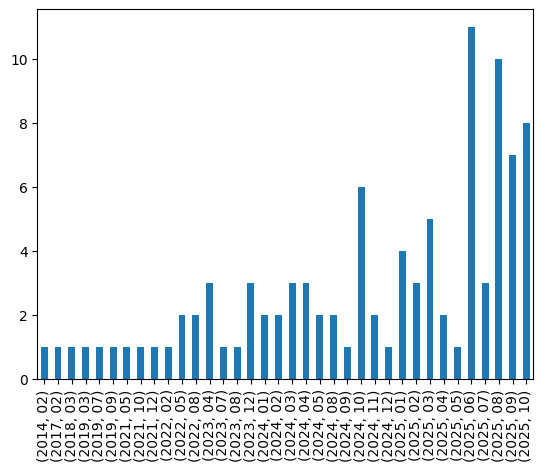

In [61]:
series.plot(kind="bar")